In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Declare a base using automap_base
Base = automap_base()


In [7]:
# Print all the classes mapped to the base

Base.prepare(autoload_with=engine)
Base.classes.keys()


['measurement', 'station']

In [8]:
#Assign the measurement class to a variable called 'Measurement' and 
#the station class to a variable called 'Station' 

Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create a session

session = Session(engine)


# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent_date


('2017-08-23',)

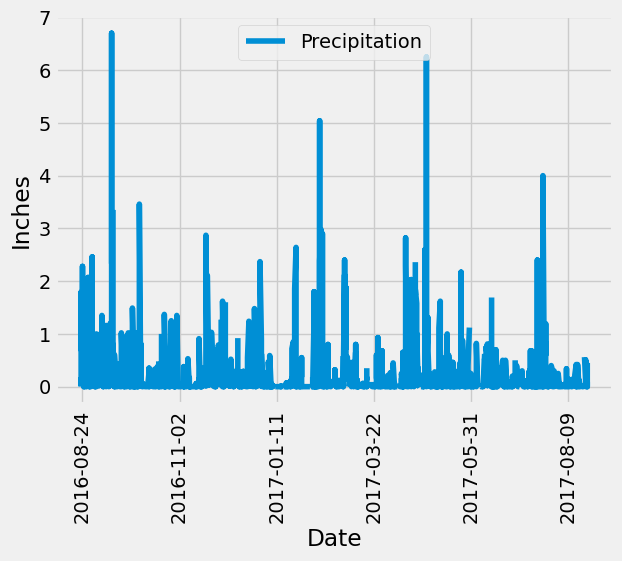

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
one_year_ago = session.query(func.date(most_recent_date.date, '-1 year')).scalar()


# Perform a query to retrieve the data and precipitation scores
last_12_months_data = session.query(Measurement.date, Measurement.prcp).\
                          filter(Measurement.date >= one_year_ago).\
                          order_by(Measurement.date).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(last_12_months_data, columns=['date', 'precipitation'])

# Sort the dataframe by date

df.sort_values(by=['date'],inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots()
ax.plot(df['date'], df['precipitation'], label='Precipitation')

# Set x-axis major locator to display 5 or 6 ticks
ax.xaxis.set_major_locator(mdates.DayLocator(interval=70))


# Rotate date labels for better readability
plt.xticks(rotation=90)

# Adding labels and legend
ax.set_xlabel('Date')
ax.set_ylabel('Inches')
ax.legend(loc='upper center')
plt.show()


In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station.station).count()
print(total_stations)


9


In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_station = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
print(most_active_station)


[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
act_station_data = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
print(act_station_data)


[(54.0, 85.0, 71.66378066378067)]


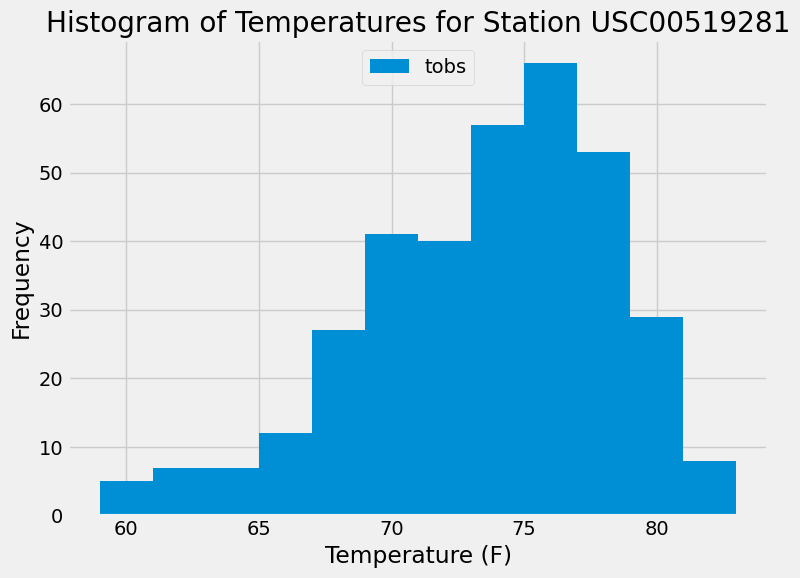

In [16]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_12months_temp = session.query(Measurement.tobs).\
    filter(Measurement.date >= one_year_ago).\
    filter(Measurement.station=='USC00519281').all()

# using list comprehension to generate list of temperatures for histogram
temperatures = [temp[0] for temp in last_12months_temp]

# Plotting histogram
plt.figure(figsize=(8, 6))
plt.hist(temperatures, bins=12, label='tobs')  
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.title('Histogram of Temperatures for Station USC00519281')
plt.grid(True)
plt.legend(loc='upper center')
plt.tight_layout()
plt.show()

# Close Session

In [17]:
# Close Session
session.close()